Matriz de transformación A:
[[ 0.7 -0.7]
 [ 0.7  0.7]]

Puntos originales (vértices del cuadrado):
Vértice 1: [-1 -1]
Vértice 2: [ 1 -1]
Vértice 3: [1 1]
Vértice 4: [-1  1]

Puntos transformados:
Vértice 1: [-1 -1] -> [ 0.  -1.4]
Vértice 2: [ 1 -1] -> [1.4 0. ]
Vértice 3: [1 1] -> [0.  1.4]
Vértice 4: [-1  1] -> [-1.4  0. ]

Verificando la propiedad de linealidad: T(u + v) = T(u) + T(v)
Vector u: [0.5 0.3]
Vector v: [0.2 0.7]
T(u): [0.14 0.56]
T(v): [-0.35  0.63]
T(u) + T(v): [-0.21  1.19]
T(u + v): [-0.21  1.19]
¿Son iguales? True

Verificando la propiedad de homogeneidad: T(cu) = cT(u)
Escalar c: 2.5
T(c*u): [0.35 1.4 ]
c*T(u): [0.35 1.4 ]
¿Son iguales? True

Determinante de A: 0.9799999999999999
Cambio en el área: 0.9799999999999999 veces

Valores propios: [0.7+0.7j 0.7-0.7j]
Vectores propios:
Dirección 1: λ = (0.7+0.7000000000000001j), v = [0.        +0.70710678j 0.70710678+0.j        ]
Dirección 2: λ = (0.7-0.7000000000000001j), v = [0.        -0.70710678j 0.70710678-0.j        ]


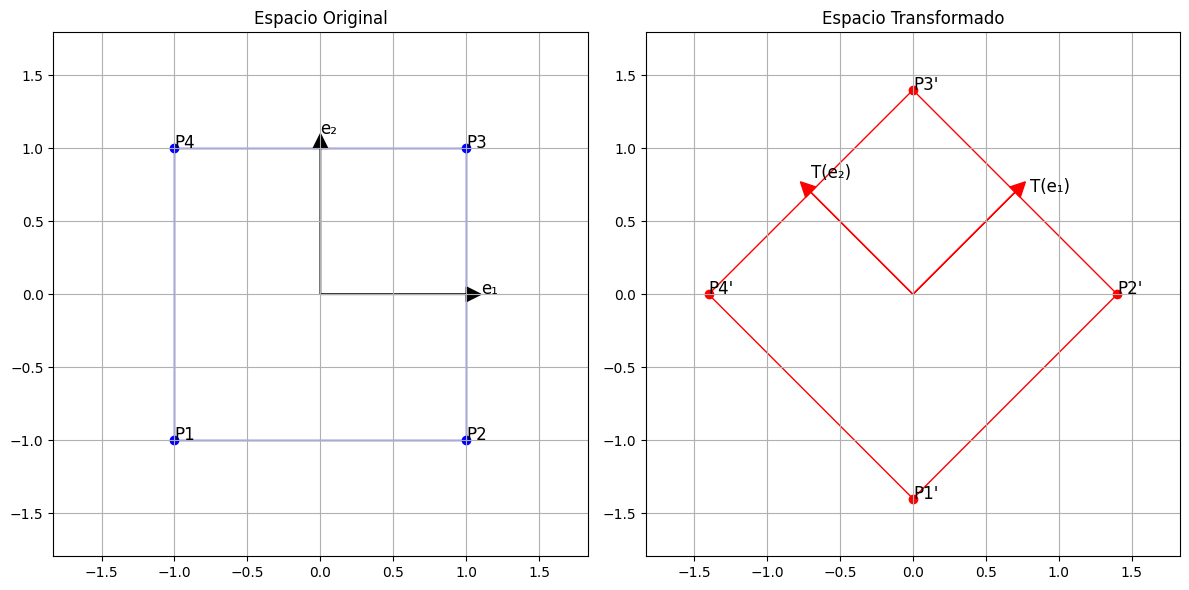

In [1]:
# Transformación Lineal con SciPy
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def main():
    """Ejemplo de transformación lineal usando SciPy"""
    
    # Definimos una transformación lineal T: R^2 → R^2 representada por una matriz 2x2
    # Esta matriz representa una combinación de rotación y escalado
    A = np.array([
        [0.7, -0.7],  # Primera fila
        [0.7,  0.7]   # Segunda fila
    ])

    print("Matriz de transformación A:")
    print(A)

    # Creamos un cuadrado en R^2 para visualizar la transformación
    square = np.array([
        [-1, -1],  # Punto inferior izquierdo
        [ 1, -1],  # Punto inferior derecho
        [ 1,  1],  # Punto superior derecho
        [-1,  1]   # Punto superior izquierdo
    ])

    print("\nPuntos originales (vértices del cuadrado):")
    for i, punto in enumerate(square):
        print(f"Vértice {i+1}: {punto}")

    # Aplicamos la transformación lineal a cada punto del cuadrado
    # T(x) = Ax para cada punto x
    square_transformed = np.dot(square, A.T)

    print("\nPuntos transformados:")
    for i, (original, transformed) in enumerate(zip(square, square_transformed)):
        print(f"Vértice {i+1}: {original} -> {transformed}")

    # Verificamos la propiedad de linealidad: T(u + v) = T(u) + T(v)
    print("\nVerificando la propiedad de linealidad: T(u + v) = T(u) + T(v)")
    u = np.array([0.5, 0.3])
    v = np.array([0.2, 0.7])

    # T(u)
    Tu = np.dot(A, u)
    # T(v)
    Tv = np.dot(A, v)
    # T(u) + T(v)
    Tu_plus_Tv = Tu + Tv
    # T(u + v)
    Tuv = np.dot(A, u + v)

    print(f"Vector u: {u}")
    print(f"Vector v: {v}")
    print(f"T(u): {Tu}")
    print(f"T(v): {Tv}")
    print(f"T(u) + T(v): {Tu_plus_Tv}")
    print(f"T(u + v): {Tuv}")
    print(f"¿Son iguales? {np.allclose(Tu_plus_Tv, Tuv)}")

    # Verificamos la propiedad de homogeneidad: T(cu) = cT(u)
    c = 2.5
    print("\nVerificando la propiedad de homogeneidad: T(cu) = cT(u)")
    # T(cu)
    Tcu = np.dot(A, c*u)
    # cT(u)
    cTu = c * Tu
    print(f"Escalar c: {c}")
    print(f"T(c*u): {Tcu}")
    print(f"c*T(u): {cTu}")
    print(f"¿Son iguales? {np.allclose(Tcu, cTu)}")

    # Análisis de la transformación
    # Calculamos el determinante para ver si la transformación preserva el área
    det_A = np.linalg.det(A)
    print(f"\nDeterminante de A: {det_A}")
    print(f"Cambio en el área: {abs(det_A)} veces")

    # Calculamos los valores y vectores propios para entender la dirección
    # y magnitud de transformación principal
    eigenvalues, eigenvectors = np.linalg.eig(A)
    print("\nValores propios:", eigenvalues)
    print("Vectores propios:")
    for i, (val, vec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        print(f"Dirección {i+1}: λ = {val}, v = {vec}")
        
    # Encontramos la matriz de transformación inversa si es posible
    if abs(det_A) > 1e-10:  # Si el determinante no es cero
        A_inv = linalg.inv(A)
        print("\nMatriz inversa (transforma de vuelta al espacio original):")
        print(A_inv)
        
        # Verificamos que A_inv realmente es la inversa de A
        producto = np.dot(A, A_inv)
        print("\nA × A⁻¹:")
        print(producto)
        print(f"¿Es aproximadamente la matriz identidad? {np.allclose(producto, np.eye(2))}")
        
        # Aplicamos la transformación inversa a los puntos transformados
        square_back = np.dot(square_transformed, A_inv.T)
        print("\nPuntos después de aplicar la transformación inversa:")
        for i, (transformed, back) in enumerate(zip(square_transformed, square_back)):
            print(f"Vértice {i+1}: {transformed} -> {back}")
        print(f"¿Se recuperaron los puntos originales? {np.allclose(square, square_back)}")
    else:
        print("\nLa transformación no es invertible (determinante cero).")
        print("No se puede transformar unívocamente de vuelta al espacio original.")

    # Visualización
    plot_transformation(square, square_transformed, A)

def plot_transformation(original, transformed, A):
    """Función para visualizar la transformación lineal"""
    plt.figure(figsize=(12, 6))
    
    # Dibujar el cuadrado original
    plt.subplot(1, 2, 1)
    polygon = Polygon(original, fill=False, edgecolor='blue', label='Original')
    plt.gca().add_patch(polygon)
    plt.scatter(original[:, 0], original[:, 1], color='blue')
    for i, (x, y) in enumerate(original):
        plt.text(x, y, f'P{i+1}', fontsize=12)
    
    # Dibujar los vectores base
    plt.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')
    plt.arrow(0, 0, 0, 1, head_width=0.1, head_length=0.1, fc='black', ec='black')
    plt.text(1.1, 0, 'e₁', fontsize=12)
    plt.text(0, 1.1, 'e₂', fontsize=12)
    
    plt.grid(True)
    plt.axis('equal')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title('Espacio Original')
    
    # Dibujar el cuadrado transformado
    plt.subplot(1, 2, 2)
    polygon_t = Polygon(transformed, fill=False, edgecolor='red', label='Transformado')
    plt.gca().add_patch(polygon_t)
    plt.scatter(transformed[:, 0], transformed[:, 1], color='red')
    for i, (x, y) in enumerate(transformed):
        plt.text(x, y, f'P{i+1}\'', fontsize=12)
    
    # Dibujar los vectores base transformados
    v1 = A @ np.array([1, 0])  # Transformación del vector base e₁
    v2 = A @ np.array([0, 1])  # Transformación del vector base e₂
    plt.arrow(0, 0, v1[0], v1[1], head_width=0.1, head_length=0.1, fc='red', ec='red')
    plt.arrow(0, 0, v2[0], v2[1], head_width=0.1, head_length=0.1, fc='red', ec='red')
    plt.text(v1[0]+0.1, v1[1], 'T(e₁)', fontsize=12)
    plt.text(v2[0], v2[1]+0.1, 'T(e₂)', fontsize=12)
    
    plt.grid(True)
    plt.axis('equal')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title('Espacio Transformado')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()